In [1]:
import numpy as np
from generate_hnb import *
import pandas as pd
from simulate_function import *

In [ ]:
#10 per 20s
#200 -> 2*200= 400s ~ 7 minutes

In [2]:
k=2
data=datasets = simulation_plan(
    B=200,
    n=300,
    k=k,
    cov_type="nbinary",
    beta1_vals=np.linspace(-2, 2, 9),
    gamma1_vals=np.linspace(-2, 2, 9),
    alpha1_vals=np.linspace(-2, 2, 9)
)


Generating: β1=-2.0, γ1=-2.0, α1=-2.0
6.8966666666666665
8.006666666666666
6.04
4.93
6.626666666666667
3.466666666666667
6.73
4.706666666666667
10.37
4.24
7.476666666666667
6.19
6.053333333333334
5.953333333333333
7.01
4.293333333333333
9.32
7.753333333333333
5.096666666666667
8.393333333333333
5.336666666666667
5.113333333333333
3.53
3.933333333333333
2.5233333333333334
6.946666666666666
4.136666666666667
5.3533333333333335
5.753333333333333
9.016666666666667
3.513333333333333
7.37
4.8533333333333335
4.913333333333333
3.7333333333333334
6.826666666666667
4.3566666666666665
7.163333333333333
8.533333333333333
5.17
8.976666666666667
9.04
5.293333333333333
7.073333333333333
5.083333333333333
7.8566666666666665
4.613333333333333
4.583333333333333
4.626666666666667
9.556666666666667
7.1466666666666665
11.426666666666666
5.783333333333333
7.926666666666667
5.96
8.496666666666666
5.256666666666667
5.496666666666667
5.823333333333333
5.626666666666667
10.053333333333333
7.316666666666666
7.63

In [4]:
import pickle

In [5]:


# Save results
with open('simulation_dataset_nbin.pkl', 'wb') as f:
    pickle.dump(data, f)

In [6]:
# Load later
with open('simulation_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

KeyboardInterrupt: 

In [7]:
len(data)

145800

In [ ]:
len(data[(data[0]['params']['beta1']==-2) & (data[0]['params']['gamma1']==-2) & (data[0]['params']['alpha1']==-2)])

C:\Users\STD_IndTrainee3\AppData\Local\Temp\ipykernel_5272\3037761798.py:1: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  len(data[(data[0]['params']['beta1']==-2) & (data[0]['params']['gamma1']==-2) & (data[0]['params']['alpha1']==-2)])


2

In [8]:
for i in data:
    if (i['params']['beta1']==0) and (i['params']['gamma1']==0) and (i['params']['alpha1']==2):
        df=i['data']
        print(df['y'].value_counts())
        break

y
0    159
2    141
Name: count, dtype: int64


In [ ]:
l=[]
for i in data:
    for beata in np.linspace(-2, 2, 9):
        for gamma in np.linspace(-2, 2, 9):
            for alpha in np.linspace(-2, 2, 9):
                if (i['params']['beta1']==beata) and (i['params']['gamma1']==gamma) and (i['params']['alpha1']==alpha):
                    df=i['data']
                    l.append(len(df['y'].value_counts()))
                    

In [85]:
np.mean(l)

np.float64(5.087798353909465)

In [13]:
import matplotlib.pyplot as plt
plt.hist(l, bins=20)

NameError: name 'l' is not defined

In [100]:
abg=[]
for i in data:
    for beata in np.linspace(-2, 2, 9):
        for gamma in np.linspace(-2, 2, 9):
            for alpha in np.linspace(-2, 2, 9):
                if (i['params']['beta1']==beata) and (i['params']['gamma1']==gamma) and (i['params']['alpha1']==alpha):
                    df=i['data']
                    p_0 = round(df['y'].value_counts().get(0, 0) / len(df), 5)
                    p_k = round(df['y'].value_counts().get(k, 0) / len(df), 5)
                    p_p = max(1 - p_0 - p_k, 0)
                    y_mean = df['y'].mean()
                    y_std = df['y'].std()
                    abg.append({
                            'data': df,
                            'beta1':beata,
                            'gamma1':gamma,
                            'alpha1':alpha,
                            'n_unique': len(df['y'].value_counts()), 
                            'p_0': p_0,
                            'p_k': p_k,
                            'p_p': p_p,
                            'y_mean': y_mean,
                            'y_std': y_std
                    })
                    

In [155]:
abg_df = pd.DataFrame(abg)
abg_df.head()

,data,beta1,gamma1,alpha1,n_unique,p_0,p_k,p_p,y_mean,y_std,poisson_pred,nb_pred,y_test,poisson_mse,nb_mse,poisson_mae,nb_mae,poisson_r2,nb_r2
0,y x intercept 0 1 0.796515 ...,-2.0,-2.0,-2.0,5,0.55000,0.18333,0.26667,0.673333,0.857754,203 0.400248 266 0.594140 152 0.79357...,203 0.400259 266 0.594152 152 0.79358...,203 0 266 0 152 1 9 1 233 3 ...,0.659533,0.659535,0.667519,0.667523,0.097751,0.097748
1,y x intercept 0 0 -2.142718 ...,-2.0,-2.0,-2.0,6,0.46667,0.22667,0.30666,0.816667,0.916071,203 0.844358 266 0.682340 152 0.51852...,203 0.844359 266 0.682341 152 0.51852...,203 0 266 2 152 0 9 1 233 0 ...,0.767717,0.767716,0.666669,0.666669,0.110244,0.110244
2,y x intercept 0 0 -0.031480 ...,-2.0,-2.0,-2.0,5,0.46667,0.22000,0.31333,0.783333,0.843858,203 0.583397 266 0.789469 152 0.47413...,203 0.583399 266 0.789472 152 0.47413...,203 0 266 0 152 0 9 1 233 1 ...,0.900711,0.900710,0.748454,0.748454,0.007245,0.007246
3,y x intercept 0 0 -0.096652 ...,-2.0,-2.0,-2.0,6,0.51667,0.20000,0.28333,0.726667,0.876270,203 1.386791 266 0.422338 152 0.34572...,203 1.386791 266 0.422339 152 0.34572...,203 1 266 0 152 0 9 0 233 0 ...,0.836633,0.836633,0.689628,0.689628,0.086202,0.086202
4,y x intercept 0 0 -0.328946 ...,-2.0,-2.0,-2.0,5,0.53333,0.18000,0.28667,0.680000,0.840608,203 1.018909 266 0.494928 152 0.55835...,203 1.018912 266 0.494930 152 0.55835...,203 3 266 0 152 2 9 1 233 0 ...,0.718606,0.718606,0.661581,0.661581,0.070174,0.070174


In [34]:
pd.DataFrame(abg).duplicated().sum()

np.int64(13307)

In [35]:
abg_df.to_csv('parameter_combinations_with_gt5_classes_nbin.csv', index=False)

(array([4.6740e+04, 3.4777e+04, 1.6707e+04, 1.0247e+04, 7.8480e+03,
        5.4980e+03, 4.8300e+03, 3.9420e+03, 3.0320e+03, 2.6200e+03,
        3.4330e+03, 1.6930e+03, 1.3840e+03, 1.0570e+03, 8.6500e+02,
        5.4000e+02, 3.1800e+02, 1.7000e+02, 6.8000e+01, 3.1000e+01]),
 array([ 2. ,  4.1,  6.2,  8.3, 10.4, 12.5, 14.6, 16.7, 18.8, 20.9, 23. ,
        25.1, 27.2, 29.3, 31.4, 33.5, 35.6, 37.7, 39.8, 41.9, 44. ]),
 <BarContainer object of 20 artists>)

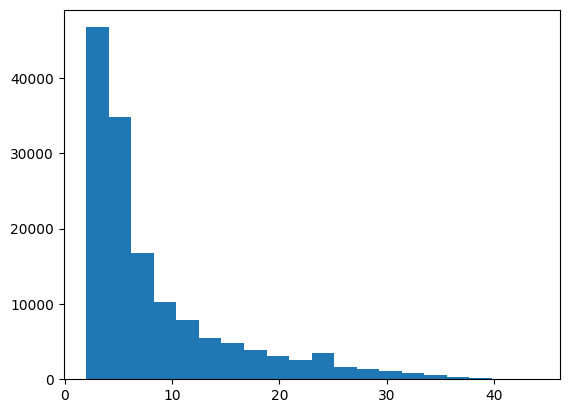

In [36]:
plt.hist(abg_df['n_unique'], bins=20)

(array([1.0000e+00, 2.1000e+01, 9.1000e+01, 3.9000e+02, 1.2910e+03,
        3.5980e+03, 5.4420e+03, 1.2913e+04, 2.0217e+04, 2.5581e+04,
        2.6381e+04, 2.1583e+04, 1.4618e+04, 6.7410e+03, 4.5070e+03,
        1.7510e+03, 5.2100e+02, 1.1900e+02, 2.8000e+01, 6.0000e+00]),
 array([0.37     , 0.3828335, 0.395667 , 0.4085005, 0.421334 , 0.4341675,
        0.447001 , 0.4598345, 0.472668 , 0.4855015, 0.498335 , 0.5111685,
        0.524002 , 0.5368355, 0.549669 , 0.5625025, 0.575336 , 0.5881695,
        0.601003 , 0.6138365, 0.62667  ]),
 <BarContainer object of 20 artists>)

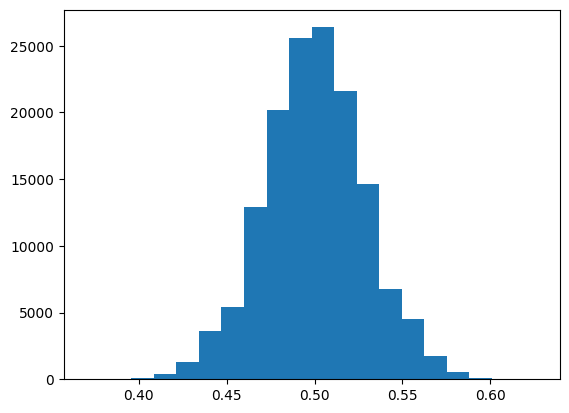

In [37]:
plt.hist(abg_df['p_0'], bins=20)

(array([1.5000e+01, 1.9400e+02, 1.1090e+03, 3.2940e+03, 7.0560e+03,
        8.0670e+03, 9.0200e+03, 9.5660e+03, 1.1726e+04, 1.0845e+04,
        1.1825e+04, 1.5092e+04, 1.4784e+04, 1.5212e+04, 1.3441e+04,
        9.8410e+03, 3.6560e+03, 9.0600e+02, 1.3500e+02, 1.6000e+01]),
 array([0.13333 , 0.157497, 0.181664, 0.205831, 0.229998, 0.254165,
        0.278332, 0.302499, 0.326666, 0.350833, 0.375   , 0.399167,
        0.423334, 0.447501, 0.471668, 0.495835, 0.520002, 0.544169,
        0.568336, 0.592503, 0.61667 ]),
 <BarContainer object of 20 artists>)

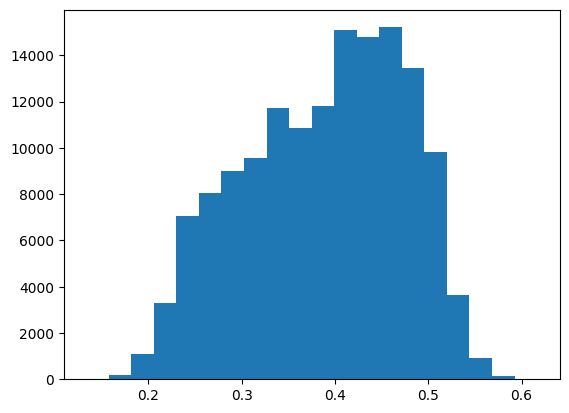

In [38]:
plt.hist(abg_df['p_k'], bins=20)

(array([1.9790e+04, 1.3559e+04, 1.4975e+04, 1.0765e+04, 1.0122e+04,
        1.0508e+04, 7.8310e+03, 8.2880e+03, 8.1760e+03, 7.9920e+03,
        7.1350e+03, 7.6850e+03, 5.7750e+03, 5.1790e+03, 4.1510e+03,
        2.4010e+03, 9.9400e+02, 3.9500e+02, 6.3000e+01, 1.6000e+01]),
 array([0.       , 0.0183335, 0.036667 , 0.0550005, 0.073334 , 0.0916675,
        0.110001 , 0.1283345, 0.146668 , 0.1650015, 0.183335 , 0.2016685,
        0.220002 , 0.2383355, 0.256669 , 0.2750025, 0.293336 , 0.3116695,
        0.330003 , 0.3483365, 0.36667  ]),
 <BarContainer object of 20 artists>)

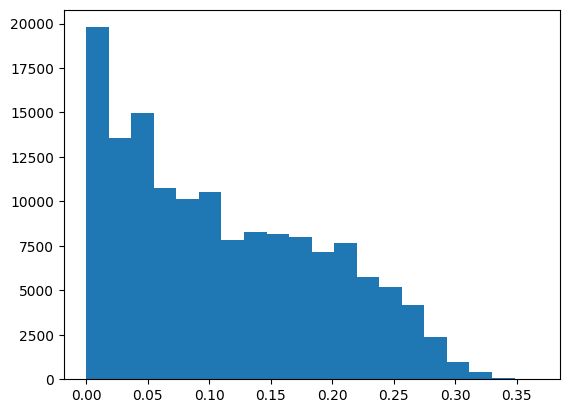

In [39]:
plt.hist(abg_df['p_p'], bins=20)

In [18]:
(abg_df['p_p']==0).mean()

np.float64(0.07563786008230453)

In [156]:
from scipy.stats import nbinom

r_hat=abg_df['y_mean']**2 / (abg_df['y_std']**2 - abg_df['y_mean'])
abg_df['r_hat']=r_hat

abg_df['p_nb'] = (abg_df['r_hat'] / (abg_df['r_hat'] + abg_df['y_mean']))**abg_df['r_hat']
abg_df['p0_nb'] = nbinom.pmf(0, abg_df['r_hat'], abg_df['r_hat']/(abg_df['r_hat'] + abg_df['y_mean']))
abg_df['pk_nb'] = nbinom.pmf(k, abg_df['r_hat'], abg_df['r_hat']/(abg_df['r_hat'] + abg_df['y_mean']))

In [157]:
abg_df.head()

,data,beta1,gamma1,alpha1,n_unique,p_0,p_k,p_p,y_mean,y_std,...,poisson_mse,nb_mse,poisson_mae,nb_mae,poisson_r2,nb_r2,r_hat,p_nb,p0_nb,pk_nb
0,y x intercept 0 1 0.796515 ...,-2.0,-2.0,-2.0,5,0.55000,0.18333,0.26667,0.673333,0.857754,...,0.659533,0.659535,0.667519,0.667523,0.097751,0.097748,7.264735,0.525223,0.525223,0.113447
1,y x intercept 0 0 -2.142718 ...,-2.0,-2.0,-2.0,6,0.46667,0.22667,0.30666,0.816667,0.916071,...,0.767717,0.767716,0.666669,0.666669,0.110244,0.110244,29.616295,0.446815,0.446815,0.145876
2,y x intercept 0 0 -0.031480 ...,-2.0,-2.0,-2.0,5,0.46667,0.22000,0.31333,0.783333,0.843858,...,0.900711,0.900710,0.748454,0.748454,0.007245,0.007246,-8.613602,0.439872,NaN,NaN
3,y x intercept 0 0 -0.096652 ...,-2.0,-2.0,-2.0,6,0.51667,0.20000,0.28333,0.726667,0.876270,...,0.836633,0.836633,0.689628,0.689628,0.086202,0.086202,12.822303,0.493209,0.493209,0.125720
4,y x intercept 0 0 -0.328946 ...,-2.0,-2.0,-2.0,5,0.53333,0.18000,0.28667,0.680000,0.840608,...,0.718606,0.718606,0.661581,0.661581,0.070174,0.070174,17.369045,0.513232,0.513232,0.116213


In [158]:
abg_df.shape

(145800, 23)

In [159]:
abg_df.isna().sum()

data                 0
beta1                0
gamma1               0
alpha1               0
n_unique             0
p_0                  0
p_k                  0
p_p                  0
y_mean               0
y_std                0
poisson_pred    142343
nb_pred         142343
y_test          142343
poisson_mse     142343
nb_mse          142343
poisson_mae     142343
nb_mae          142343
poisson_r2      142343
nb_r2           142343
r_hat                0
p_nb                 0
p0_nb            26473
pk_nb            26473
dtype: int64

In [166]:
abg_dropna = abg_df.dropna()

In [167]:
abg_dropna.shape

(2996, 23)

In [160]:
abg_dropna.loc[abg_dropna['p_0']>abg_dropna['p0_nb'], '0_inflated'] = 1 # 0 inflation detected
abg_dropna.loc[abg_dropna['p_0']<=abg_dropna['p0_nb'], '0_inflated'] = 0  

abg_dropna.loc[abg_dropna['p_k']>abg_dropna['pk_nb'], 'k_inflated'] = 1 # k inflation detected
abg_dropna.loc[abg_dropna['p_k']<=abg_dropna['pk_nb'], 'k_inflated'] = 0 # 


In [161]:
abg_dropna['0_inflated'].value_counts()

0_inflated
1.0    81826
0.0    37501
Name: count, dtype: int64

In [162]:
abg_dropna['k_inflated'].value_counts()

k_inflated
1.0    119327
Name: count, dtype: int64

In [148]:
abg_df.loc[(abg_df['r_hat']<0)==True, :]

,beta1,gamma1,alpha1,n_unique,p_0,p_k,p_p,y_mean,y_std,r_hat,p_nb,p0_nb,pk_nb
2,-2.0,-2.0,-2.0,5,0.46667,0.22000,0.31333,0.783333,0.843858,-8.613602,0.439872,NaN,NaN
6,-2.0,-2.0,-2.0,4,0.51000,0.21000,0.28000,0.740000,0.857234,-106.319740,0.475881,NaN,NaN
7,-2.0,-2.0,-2.0,4,0.52000,0.16667,0.31333,0.653333,0.762733,-5.963855,0.500590,NaN,NaN
8,-2.0,-2.0,-2.0,5,0.46333,0.23333,0.30334,0.796667,0.858942,-10.778227,0.437077,NaN,NaN
11,-2.0,-2.0,-2.0,4,0.48000,0.21000,0.31000,0.743333,0.808063,-6.114389,0.452689,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145792,2.0,2.0,2.0,6,0.43667,0.26000,0.30333,0.853333,0.880002,-9.225642,0.408438,NaN,NaN
145793,2.0,2.0,2.0,4,0.51333,0.20667,0.28000,0.706667,0.814145,-11.392214,0.482133,NaN,NaN
145795,2.0,2.0,2.0,4,0.51000,0.21333,0.27667,0.710000,0.809166,-9.123844,0.477521,NaN,NaN
145796,2.0,2.0,2.0,6,0.44667,0.25333,0.30000,0.856667,0.919569,-66.359714,0.422213,NaN,NaN


(array([9.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.45791e+05]),
 array([-5.06654958e+15, -4.55989462e+15, -4.05323966e+15, -3.54658471e+15,
        -3.03992975e+15, -2.53327479e+15, -2.02661983e+15, -1.51996487e+15,
        -1.01330992e+15, -5.06654958e+14,  6.36321833e+03]),
 <BarContainer object of 10 artists>)

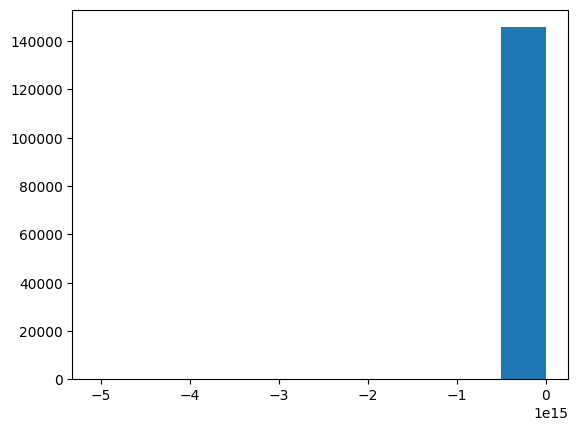

In [149]:
plt.hist(abg_df['r_hat'])

In [82]:
np.min(abg_df['r_hat']), np.max(abg_df['r_hat'])

(np.float64(-5066549580791808.0), np.float64(6363.218333336294))

In [151]:
np.min(abg_dropna['r_hat']), np.max(abg_dropna['r_hat'])

(np.float64(0.0035849601451541538), np.float64(6363.218333336294))

In [165]:
(abg_dropna['r_hat']>20).mean() # approximately poisson

np.float64(0.1616147225690749)

(array([291.,  76.,  22.,  26.,  39.,  32.,   0.,   0.,   0.,   2.]),
 array([ 503.88921986, 1089.82213121, 1675.75504255, 2261.6879539 ,
        2847.62086525, 3433.5537766 , 4019.48668795, 4605.41959929,
        5191.35251064, 5777.28542199, 6363.21833334]),
 <BarContainer object of 10 artists>)

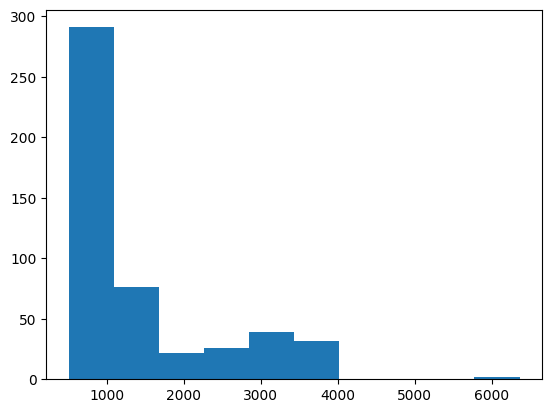

In [98]:
plt.hist(abg_dropna.loc[abg_dropna['r_hat']>500,'r_hat'])

In [117]:
# 10 -> 0.3s
#
s=len(abg)/10*0.3
s/60/60

1.215

In [164]:
for i in abg_dropna.itertuples(index=False):
    lol=i
    print(i)
    break

Pandas(beta1=-2.0, gamma1=-2.0, alpha1=-2.0, n_unique=5, p_0=0.55, p_k=0.18333, p_p=0.26666999999999996, y_mean=0.6733333333333333, y_std=0.8577536709855494, r_hat=7.264735024413476, p_nb=0.5252228569631727, p0_nb=0.5252228569631727, pk_nb=0.11344696847225419, _13=1.0, k_inflated=1.0)


In [138]:
lol.beta1

-2.0

In [163]:
# poisson and NB
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []

results = []

for row in abg_dropna.itertuples(index=False):
    df = row.data.copy()
    
    # Add intercept
    df['intercept'] = 1

    X = df.loc[:, ['intercept', 'x']]     
    y = df['y']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Fit models
    try:
        poisson_model = sm.GLM(y_train, X_train, 
                              family=sm.families.Poisson()).fit()
        poisson_pred = poisson_model.predict(X_test)
        poisson_mse = mean_squared_error(y_test, poisson_pred)
        poisson_mae = mean_absolute_error(y_test, poisson_pred)
        poisson_r2 = r2_score(y_test, poisson_pred)
    except Exception as e:
        print(f"Poisson model failed for beta={row.beta1}, gamma={row.gamma1}, alpha={row.alpha1}: {e}")
        poisson_pred = None
        poisson_mse = None
        poisson_mae = None
        poisson_r2 = None

    try:
        nb2_model = sm.NegativeBinomial(y_train, X_train).fit()
        nb_pred = nb2_model.predict(X_test)
        nb_mse = mean_squared_error(y_test, nb_pred)
        nb_mae = mean_absolute_error(y_test, nb_pred)
        nb_r2 = r2_score(y_test, nb_pred)
    except Exception as e:
        print(f"NB model failed for beta={row.beta1}, gamma={row.gamma1}, alpha={row.alpha1}: {e}")
        nb_pred = None
        nb_mse = None
        nb_mae = None
        nb_r2 = None

    # Create result dictionary
    result = {
        'beta1': row.beta1,
        'gamma1': row.gamma1,
        'alpha1': row.alpha1,
        'poisson_mse': poisson_mse,
        'nb_mse': nb_mse,
        'poisson_mae': poisson_mae,
        'nb_mae': nb_mae,
        'poisson_r2': poisson_r2,
        'nb_r2': nb_r2,
        # Store only predictions for test set to save memory
        'test_indices': X_test.index.tolist(),
        'poisson_pred': poisson_pred.tolist() if poisson_pred is not None else None,
        'nb_pred': nb_pred.tolist() if nb_pred is not None else None,
        'y_test': y_test.tolist() if y_test is not None else None
    }
    
    results.append(result)

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(results)

AttributeError: 'Pandas' object has no attribute 'data'

In [113]:
results_df = pd.DataFrame(results)
results_df

,data,beta1,gamma1,alpha1,n_unique,p_0,p_k,p_p,y_mean,y_std,poisson_pred,nb_pred,y_test,poisson_mse,nb_mse,poisson_mae,nb_mae,poisson_r2,nb_r2
0,y x intercept 0 1 0.796515 ...,-2.0,-2.0,-2.0,5,0.55000,0.18333,0.26667,0.673333,0.857754,203 0.400248 266 0.594140 152 0.79357...,203 0.400259 266 0.594152 152 0.79358...,203 0 266 0 152 1 9 1 233 3 ...,0.659533,0.659535,0.667519,0.667523,0.097751,0.097748
1,y x intercept 0 0 -2.142718 ...,-2.0,-2.0,-2.0,6,0.46667,0.22667,0.30666,0.816667,0.916071,203 0.844358 266 0.682340 152 0.51852...,203 0.844359 266 0.682341 152 0.51852...,203 0 266 2 152 0 9 1 233 0 ...,0.767717,0.767716,0.666669,0.666669,0.110244,0.110244
2,y x intercept 0 0 -0.031480 ...,-2.0,-2.0,-2.0,5,0.46667,0.22000,0.31333,0.783333,0.843858,203 0.583397 266 0.789469 152 0.47413...,203 0.583399 266 0.789472 152 0.47413...,203 0 266 0 152 0 9 1 233 1 ...,0.900711,0.900710,0.748454,0.748454,0.007245,0.007246
3,y x intercept 0 0 -0.096652 ...,-2.0,-2.0,-2.0,6,0.51667,0.20000,0.28333,0.726667,0.876270,203 1.386791 266 0.422338 152 0.34572...,203 1.386791 266 0.422339 152 0.34572...,203 1 266 0 152 0 9 0 233 0 ...,0.836633,0.836633,0.689628,0.689628,0.086202,0.086202
4,y x intercept 0 0 -0.328946 ...,-2.0,-2.0,-2.0,5,0.53333,0.18000,0.28667,0.680000,0.840608,203 1.018909 266 0.494928 152 0.55835...,203 1.018912 266 0.494930 152 0.55835...,203 3 266 0 152 2 9 1 233 0 ...,0.718606,0.718606,0.661581,0.661581,0.070174,0.070174
5,y x intercept 0 1 1.373958 ...,-2.0,-2.0,-2.0,6,0.49333,0.22667,0.28000,0.790000,0.921265,203 0.944235 266 0.377434 152 0.89139...,203 0.944235 266 0.377435 152 0.89139...,203 2 266 0 152 0 9 2 233 1 ...,0.938614,0.938614,0.740575,0.740576,0.130217,0.130217
6,y x intercept 0 0 0.172376 ...,-2.0,-2.0,-2.0,4,0.51000,0.21000,0.28000,0.740000,0.857234,203 0.604324 266 0.808784 152 0.64135...,203 0.604334 266 0.808794 152 0.64136...,203 0 266 1 152 2 9 3 233 2 ...,0.646134,0.646134,0.666459,0.666462,0.103975,0.103975
7,y x intercept 0 0 -0.399749 ...,-2.0,-2.0,-2.0,4,0.52000,0.16667,0.31333,0.653333,0.762733,203 1.113124 266 0.439143 152 0.44272...,203 1.113121 266 0.439141 152 0.44272...,203 1 266 2 152 0 9 0 233 2 ...,0.606977,0.606978,0.611813,0.611813,0.025467,0.025466
8,y x intercept 0 0 -2.483337 ...,-2.0,-2.0,-2.0,5,0.46333,0.23333,0.30334,0.796667,0.858942,203 0.722869 266 1.039939 152 1.13313...,203 0.722870 266 1.039940 152 1.13313...,203 2 266 1 152 0 9 0 233 1 ...,0.652418,0.652418,0.692642,0.692642,0.053790,0.053790
9,y x intercept 0 0 0.661583 ...,-2.0,-2.0,-2.0,5,0.53000,0.27667,0.19333,0.780000,0.952869,203 0.812173 266 0.571144 152 0.81671...,203 0.814327 266 0.560853 152 0.81915...,203 2 266 0 152 0 9 0 233 0 ...,0.748636,0.748414,0.766457,0.766671,0.101503,0.101770


np.float64(0.0)

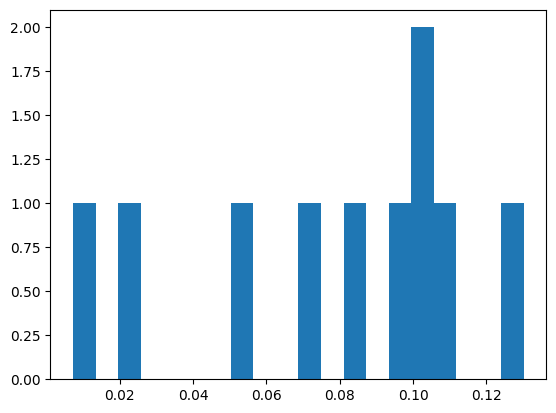

In [123]:
plt.hist(results_df['nb_r2'], bins=20)
(results_df['nb_r2']<0).mean()

In [ ]:

# Example data
np.random.seed(0)
n = 200
x1 = np.random.normal(size=n)
x2 = np.random.normal(size=n)

# Generate counts from a Poisson model
mu = np.exp(0.5 + 1.2*x1 - 0.8*x2)
y = np.random.poisson(mu)

# Create DataFrame
df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})

# Add intercept
df['intercept'] = 1

X=df.loc[:,['intercept','x1','x2']]     
y=df['y']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42
)

# Fit Poisson model
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_model.summary())


nb2_model = sm.NegativeBinomial(
    y_train, 
    X_train,
).fit()

print(nb2_model.summary())


poisson_pred = poisson_model.predict(X_test)
print(poisson_pred)

nb_pred = nb2_model.predict(X_test)
print(nb_pred)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  140
Model:                            GLM   Df Residuals:                      137
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -246.41
Date:                Fri, 12 Dec 2025   Deviance:                       150.53
Time:                        15:31:20   Pearson chi2:                     157.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9997
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4764      0.075      6.313      0.0

c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
poisson_mse = mean_squared_error(y_test, poisson_pred)
nb_mse = mean_squared_error(y_test, nb_pred)
poisson_mae = mean_absolute_error(y_test, poisson_pred)
nb_mae = mean_absolute_error(y_test, nb_pred)
nb_r2 = r2_score(y_test, nb_pred)
poisson_r2 = r2_score(y_test, poisson_pred)
print(f"Poisson MSE: {poisson_mse}, MAE: {poisson_mae}, R2: {poisson_r2}")
print(f"Negative Binomial MSE: {nb_mse}, MAE: {nb_mae}, R2: {nb_r2}")

Poisson MSE: 6.642896091780996, MAE: 1.4384704157510193, R2: 0.9281976288573148
Negative Binomial MSE: 6.64294740412872, MAE: 1.4384724013650094, R2: 0.9281970742274991
